In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

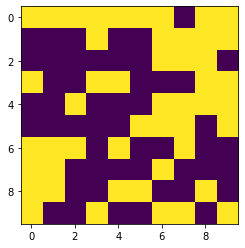

In [3]:
#Setting up the intial state
def initial_state(rng, n):
    """
    Generates a random spin configuration
    """  
    return 2*rng.integers(2, size=((n,n))) - 1

N=10
rng = np.random.default_rng()
x = initial_state(rng, N)
plt.imshow(x)
plt.show()

In [4]:

"""
    magnetization for this configuration
"""
@njit
def compute_magnetization(grid):
    return np.abs(np.sum(grid))


"""
Energy for this configuration
"""
##@njit
def compute_energy(grid,J,B):
    S1: float = 0
    S2: float = 0
    H: float  = 0
    n:  int = grid.shape[0]

    S11,S12 = 0,0

    for i in range(0, n):
        for j in range(0, n):
            if i == 0 or j == 0 or i == n-1 or j == n-1 :
                 continue
            S1 += (grid[i,j-1] + grid[i,j+1])*(grid[i-1,j] + grid[i+1,j])
            S2 += grid[i-1,j] + grid[i+1,j]
    H = -J*S1-B*S2
   
    return H

B=0
J=1
M = compute_magnetization(x)
E = compute_energy(x,J,B)
(M,E)

(2, -16)

Text(0.5, 1.0, 'Sistema con posición P=(6,2) invertida. E=-24 y M=4')

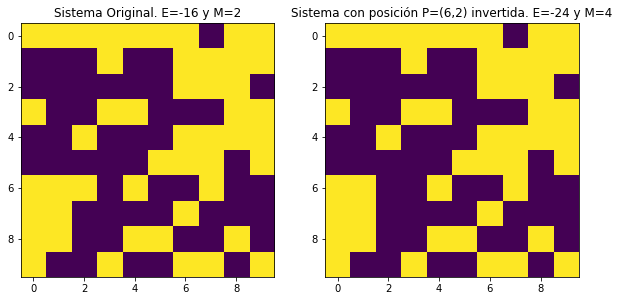

In [5]:
def reverse(grid):
    
    n = grid.shape[0]
    pos = np.random.choice(n, 2)

    grid[pos[0],pos[1]] = -1*grid[pos[0],pos[1]]

    return grid,pos


fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1,2, 1)
plt.imshow(x)
plt.title(f"Sistema Original. E={E} y M={M}")

xr , pos = reverse(x)
Mr = compute_magnetization(xr)
Er = compute_energy(xr,J,B)

fig.add_subplot(1,2, 2)
plt.imshow(xr)
plt.title(f"Sistema con posición P=({pos[0]},{pos[1]}) invertida. E={Er} y M={Mr}")
